In [1]:
import os
os.getcwd()

'C:\\Academics\\MachineLearning_Python'

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [16]:
data = pd.read_csv("airfoil_self_noise.txt", delimiter ="\t",header = None, names = ["Frequency",
                   "Angle_of_attack","Chord_length","Free_stream_velocity","Suction_side_displacement_thickness"
                   ,"Scaled_sound_pressure_level"])

In [17]:
data.head()

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [18]:
data.shape

(1503, 6)

In [22]:
type(data)

pandas.core.frame.DataFrame

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                              1503 non-null int64
Angle_of_attack                        1503 non-null float64
Chord_length                           1503 non-null float64
Free_stream_velocity                   1503 non-null float64
Suction_side_displacement_thickness    1503 non-null float64
Scaled_sound_pressure_level            1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


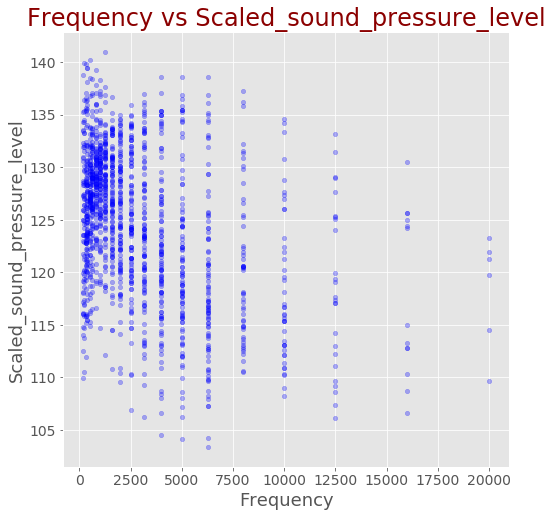

In [27]:
# Correlation between Frequency and Scaled_sound_pressure_level

data.plot(x ='Frequency', y = 'Scaled_sound_pressure_level', kind ="scatter", 
                 figsize = [8,8],
                 color ="b", alpha = 0.3, 
                fontsize = 14)
plt.title("Frequency vs Scaled_sound_pressure_level", 
          fontsize = 24, color="darkred")

plt.xlabel("Frequency", fontsize = 18) 

plt.ylabel("Scaled_sound_pressure_level", fontsize = 18)

plt.show()

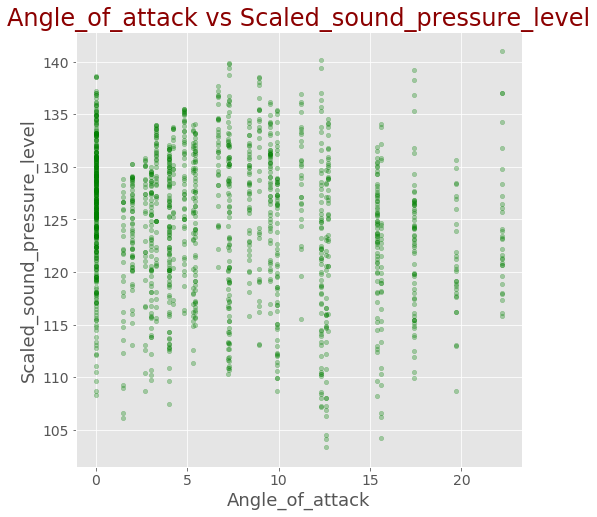

In [32]:
# Correlation between Angle_of_attack and Scaled_sound_pressure_level

data.plot(x ='Angle_of_attack', y = 'Scaled_sound_pressure_level', kind ="scatter", 
                 figsize = [8,8],
                 color ="g", alpha = 0.3, 
                fontsize = 14)
plt.title("Angle_of_attack vs Scaled_sound_pressure_level", 
          fontsize = 24, color="darkred")

plt.xlabel("Angle_of_attack", fontsize = 18) 

plt.ylabel("Scaled_sound_pressure_level", fontsize = 18)

plt.show()

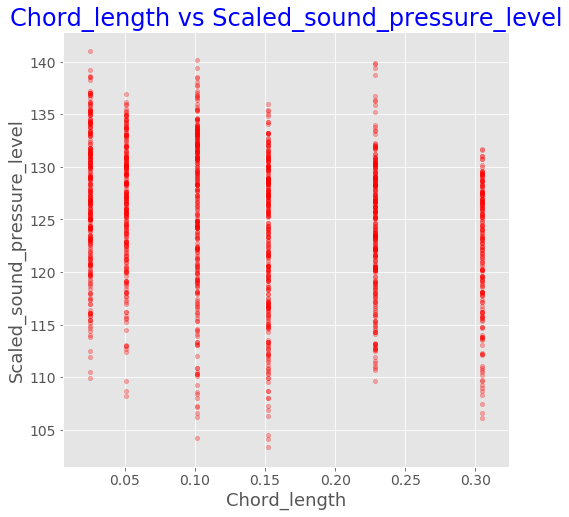

In [33]:
# Correlation between Chord_length and Scaled_sound_pressure_level

data.plot(x ='Chord_length', y = 'Scaled_sound_pressure_level', kind ="scatter", 
                 figsize = [8,8],
                 color ="r", alpha = 0.3, 
                fontsize = 14)
plt.title("Chord_length vs Scaled_sound_pressure_level", 
          fontsize = 24, color="blue")

plt.xlabel("Chord_length", fontsize = 18) 

plt.ylabel("Scaled_sound_pressure_level", fontsize = 18)

plt.show()

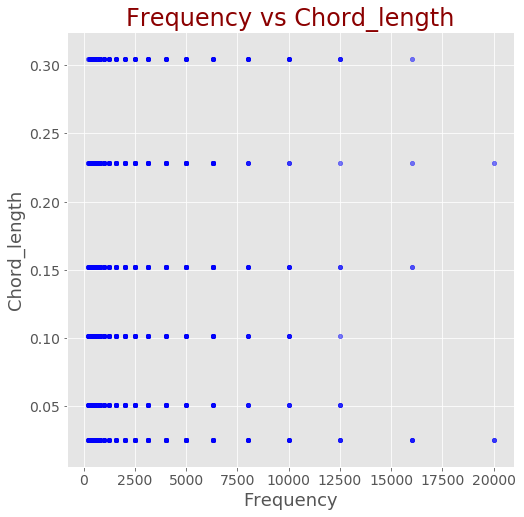

In [34]:
# As all the above graphs are showing that irrespetive of chgange in x, there is a constant change in Y
#Let us plot few grpahs between independent variables to understand any further covariance between them

# Correlation between Frequency and Chord_length

data.plot(x ='Frequency', y = 'Chord_length', kind ="scatter", 
                 figsize = [8,8],
                 color ="b", alpha = 0.3, 
                fontsize = 14)
plt.title("Frequency vs Chord_length", 
          fontsize = 24, color="darkred")

plt.xlabel("Frequency", fontsize = 18) 

plt.ylabel("Chord_length", fontsize = 18)

plt.show()

In [57]:
# As this graph also seems crazy enough to relate anything
# We shall plug in this data to Linear regression and see how this goes

x = data.drop(['Scaled_sound_pressure_level'],1)
y = data['Scaled_sound_pressure_level']

In [58]:
print(x.head())
print(x.shape)

   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  
0                             0.002663  
1                             0.002663  
2                             0.002663  
3                             0.002663  
4                             0.002663  
(1503, 5)


In [59]:
print(y.head())
print(y.shape)

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: Scaled_sound_pressure_level, dtype: float64
(1503,)


In [60]:
y=y.reshape(-1,1)

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [45]:
y.shape

(1503, 1)

In [48]:
y

array([[126.201],
       [125.201],
       [125.951],
       ...,
       [106.604],
       [106.224],
       [104.204]])

In [61]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size = 0.1)

In [62]:
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

1352 1352
151 151


In [66]:
std_scale = StandardScaler().fit(x_train)
x_train_scaled = std_scale.transform(x_train)
x_test_scaled = std_scale.transform(x_test)

In [78]:
lr = LinearRegression()
linear_reg = lr.fit(x_train_scaled,y_train) 

# Predictions
y_train_scaled_fit = linear_reg.predict(x_train_scaled)

print("R-squared for training dataset:{}".format(np.round(linear_reg.score(x_train_scaled, y_train),2)))
# Root mean square error: np.sqrt(Yhat - Y)
print("Root mean square error: {}".format(np.round(np.sqrt(mean_squared_error(y_train,y_train_scaled_fit)),2)))
print("Adjusted R-squared for training dataset:{}".
      format(np.round(1 - (1-linear_reg.score(x_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1))))

coefficients = linear_reg.coef_
features = list(x_train.columns)

print(" ")
print('The coefficients of the features from the linear model:')
print(dict(zip(features, coefficients[0])))

print("")

print("The intercept is {}".format(np.round(linear_reg.intercept_[0],3)))

R-squared for training dataset:0.51
Root mean square error: 4.78
Adjusted R-squared for training dataset:1.0
 
The coefficients of the features from the linear model:
{'Frequency': -3.9665509664771155, 'Angle_of_attack': -2.3773297055532185, 'Chord_length': -3.341213424759054, 'Free_stream_velocity': 1.544709963055044, 'Suction_side_displacement_thickness': -2.015608441324698}

The intercept is 124.838


In [76]:
# predictions on test data
pred_test = linear_reg.predict(x_test_scaled)

print("Root mean square error: {}".format(np.round(np.sqrt(mean_squared_error(y_test,pred_test)),2)))

Root mean square error: 5.01


In [91]:
ridgereg = Ridge(alpha = 1e-8)
ridgerig_output = ridgereg.fit(x_train_scaled,y_train)

# Predictions
ridgerig_pred = ridgerig_output.predict(x_train_scaled)

print("R-squared for training dataset:{}".format(np.round(ridgerig_output.score(x_train_scaled, y_train),2)))
# Root mean square error: np.sqrt(Yhat - Y)
print("Root mean square error: {}".format(np.round(np.sqrt(mean_squared_error(y_train,ridgerig_pred)),2)))

R-squared for training dataset:0.51
Root mean square error: 4.78


In [88]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for i in alpha_ridge:
    ridgeregloop = Ridge(alpha = i)
    ridgeregloop_output = ridgeregloop.fit(x_train_scaled,y_train)

# Predictions
    ridgeregloop_pred = ridgeregloop_output.predict(x_train_scaled)

    print("At Aplha value:" , i, "below are the metrics")
    print("R-squared for training dataset:{}".format(np.round(ridgeregloop_output.score(x_train_scaled, y_train),2)))
# Root mean square error: np.sqrt(Yhat - Y)
    print("Root mean square error: {}".format(np.round(np.sqrt(mean_squared_error(y_train,ridgeregloop_pred)),2)))

At Aplha value: 1e-15 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 1e-10 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 1e-08 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 0.0001 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 0.001 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 0.01 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 1 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 5 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 10 below are the metrics
R-squared for training dataset:0.51
Root mean square error: 4.78
At Aplha value: 20 below are t